# Anomaly Detection on Sinusoidal Signal using OCSVM and Isolation Forest
**Author**: Mohammad Zedan  
**Date**: 03.09.2025 16:00  
**Version**: V0.1  

### Description:
This notebook demonstrates classical anomaly detection techniques applied to a synthetic sinusoidal time series.
We apply **OCSVM** and **Isolation Forest** on a dataset with injected anomalies and evaluate performance using precision, recall, and F1-score.

Results are visualized using Chronos-style plots.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


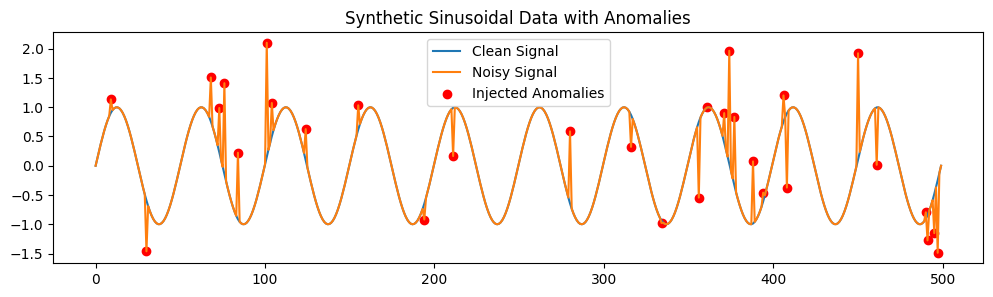

In [2]:

np.random.seed(42)
n = 500
anomaly_ratio = 0.06
x = np.sin(np.linspace(0, 20 * np.pi, n))
y = x.copy()
labels = np.zeros(n)

anomaly_indices = np.random.choice(n, int(n * anomaly_ratio), replace=False)
y[anomaly_indices] += np.random.normal(0, 1, len(anomaly_indices))
labels[anomaly_indices] = 1

plt.figure(figsize=(12, 3))
plt.plot(x, label='Clean Signal')
plt.plot(y, label='Noisy Signal')
plt.scatter(anomaly_indices, y[anomaly_indices], color='red', label='Injected Anomalies')
plt.legend()
plt.title("Synthetic Sinusoidal Data with Anomalies")
plt.show()


In [3]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(y.reshape(-1, 1))
X_train, X_test = X_scaled[:400], X_scaled[400:]
y_true_test = labels[400:]


In [4]:

# Fit models
ocsvm = OneClassSVM(nu=0.05, kernel="rbf", gamma='scale')
ocsvm.fit(X_train)
iforest = IsolationForest(contamination=0.06, random_state=42)
iforest.fit(X_train)

# Predict on test
pred_ocsvm = ocsvm.predict(X_test)
pred_iforest = iforest.predict(X_test)
scores_ocsvm = -ocsvm.decision_function(X_test)
scores_iforest = -iforest.score_samples(X_test)

# Convert predictions to 0/1
pred_ocsvm = np.where(pred_ocsvm == -1, 1, 0)
pred_iforest = np.where(pred_iforest == -1, 1, 0)


In [5]:

metrics = {}
for name, pred in zip(['OCSVM', 'IsolationForest'], [pred_ocsvm, pred_iforest]):
    precision = precision_score(y_true_test, pred)
    recall = recall_score(y_true_test, pred)
    f1 = f1_score(y_true_test, pred)
    metrics[name] = {'Precision': precision, 'Recall': recall, 'F1': f1}
    print(f"🔍 {name}:")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}\n")


🔍 OCSVM:
F1 Score: 0.5882352941176471
Precision: 0.5555555555555556
Recall: 0.625

🔍 IsolationForest:
F1 Score: 0.5
Precision: 0.35
Recall: 0.875



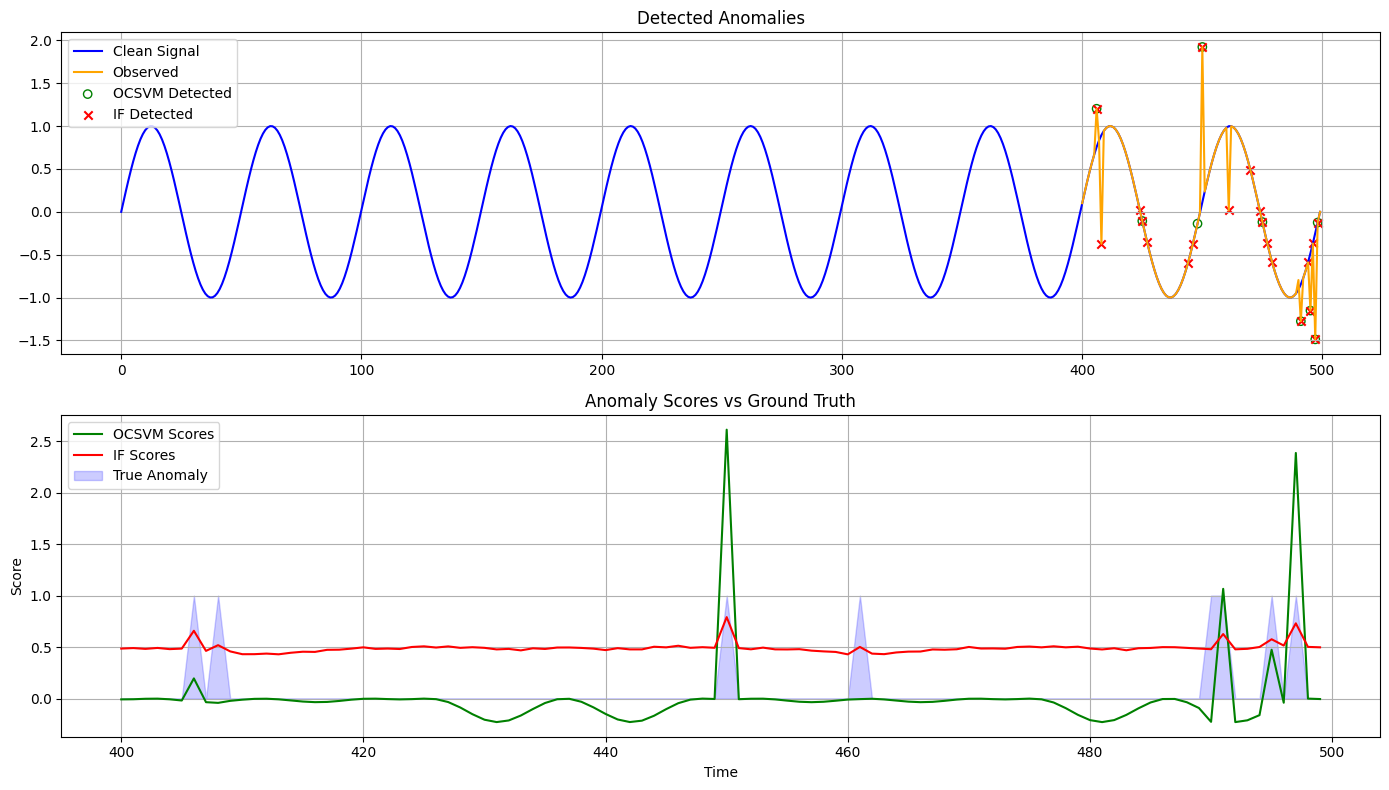

In [6]:

time_test = np.arange(400, 500)

plt.figure(figsize=(14, 8))

# Top plot: Predictions
plt.subplot(2, 1, 1)
plt.plot(x, label="Clean Signal", color='blue')
plt.plot(time_test, y[400:], label="Observed", color='orange')
plt.scatter(time_test[pred_ocsvm == 1], y[400:][pred_ocsvm == 1], marker='o', facecolors='none', edgecolors='green', label="OCSVM Detected")
plt.scatter(time_test[pred_iforest == 1], y[400:][pred_iforest == 1], marker='x', color='red', label="IF Detected")
plt.legend()
plt.title("Detected Anomalies")
plt.grid(True)

# Bottom plot: Scores
plt.subplot(2, 1, 2)
plt.plot(time_test, scores_ocsvm, label="OCSVM Scores", color='green')
plt.plot(time_test, scores_iforest, label="IF Scores", color='red')
plt.fill_between(time_test, 0, y_true_test, color='blue', alpha=0.2, label="True Anomaly")
plt.xlabel("Time")
plt.ylabel("Score")
plt.title("Anomaly Scores vs Ground Truth")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
